In [ ]:
# installing required packages

In [ ]:
!pip install pandas
!pip install xgboost
!pip install scikit-learn
!pip install matplotlib seaborn
!pip install numpy

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost as xgb
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# load csv file here
data = pd.read_csv("C:/Users/mugesram/Downloads/weather_data.csv")

Data Visualizing and PreProcessing

In [39]:
data.head()


,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
0,2023-01-01,23.745401,46.140905,7.845981,Rain,20.851051,992.965681
1,2023-01-02,30.030503,59.876587,5.382457,Rain,93.059521,1037.273025
2,2023-01-03,28.365224,51.464618,13.158008,Rain,11.636640,1034.193357
3,2023-01-04,27.550929,53.103799,5.886677,Rain,81.744971,968.610142
4,2023-01-05,23.639303,57.826186,12.248992,Rain,38.062329,1030.264331


In [40]:
data.tail()

,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
306,2023-11-03,22.072834,37.756910,4.729355,No Rain,27.307081,954.564875
307,2023-11-04,19.645885,42.190604,8.092369,No Rain,51.807877,964.002410
308,2023-11-05,23.884496,36.205508,11.860847,Rain,29.872557,977.681431
309,2023-11-06,18.168418,34.785000,4.781288,No Rain,94.067925,1047.153269
310,2023-11-07,19.389714,37.717416,9.388371,No Rain,25.929676,983.134701


In [41]:
data.describe() # checking ranges we can say that no much issues with outliers

,avg_temperature,humidity,avg_wind_speed,cloud_cover,pressure
count,296.000000,296.000000,296.000000,296.000000,311.000000
mean,25.983840,55.041385,7.556636,49.834827,1001.059119
std,6.802475,19.220133,5.344683,29.009459,28.835595
min,15.000000,30.000000,0.069480,0.321826,951.240404
25%,20.265692,34.280826,3.550354,24.530951,975.757545
50%,27.177958,56.759806,7.326421,50.725120,1001.938586
75%,32.204599,72.189837,11.050627,76.046506,1026.578884
max,35.000000,90.000000,56.636041,99.834751,1049.543752


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             311 non-null    object 
 1   avg_temperature  296 non-null    float64
 2   humidity         296 non-null    float64
 3   avg_wind_speed   296 non-null    float64
 4   rain_or_not      311 non-null    object 
 5   cloud_cover      296 non-null    float64
 6   pressure         311 non-null    float64
dtypes: float64(5), object(2)
memory usage: 17.1+ KB


In [43]:
data.dropna(inplace=True) #drop null values

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 296 entries, 0 to 310
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             296 non-null    object 
 1   avg_temperature  296 non-null    float64
 2   humidity         296 non-null    float64
 3   avg_wind_speed   296 non-null    float64
 4   rain_or_not      296 non-null    object 
 5   cloud_cover      296 non-null    float64
 6   pressure         296 non-null    float64
dtypes: float64(5), object(2)
memory usage: 18.5+ KB


In [45]:
print(data['rain_or_not'].unique()) # ensure only two labels exists

['Rain' 'No Rain']


# Feature and Target Variable EDA Analysis

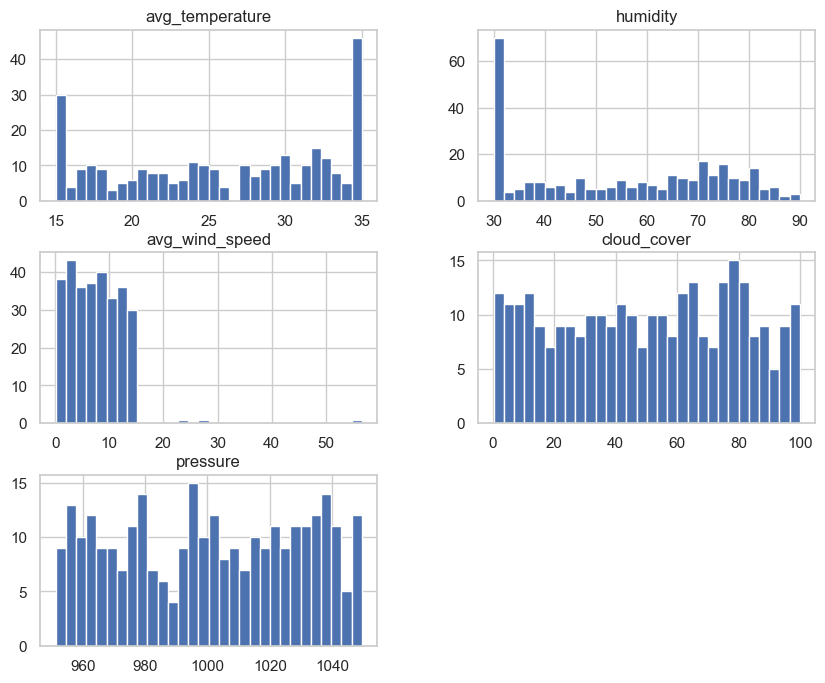

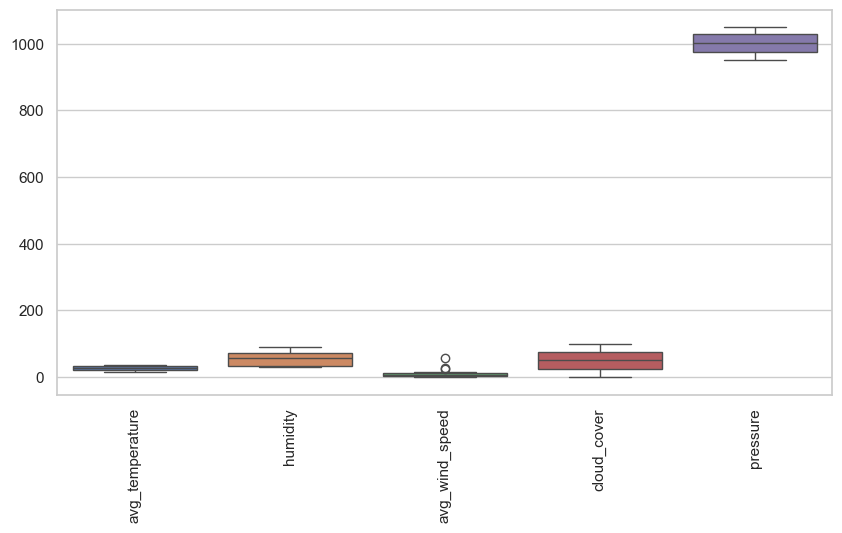

In [46]:
# Set style
sns.set(style="whitegrid")

# Histograms for numerical features
data.hist(figsize=(10, 8), bins=30)
plt.show()

# Boxplots to check for outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

# Correlation Heat Map

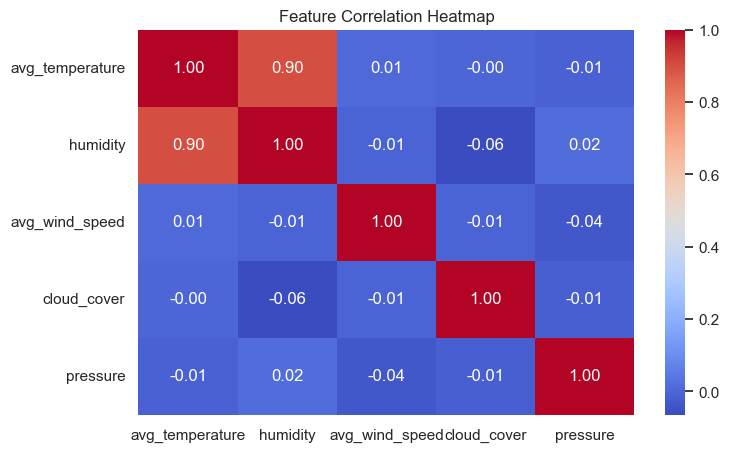

In [47]:
num_data = data.drop(columns=['date','rain_or_not'])
plt.figure(figsize=(8, 5))
sns.heatmap(num_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

From the Correlation map, We can See that all the features are nearly independent except humidity and avg_temprature 
So that we can't reduce the features count 
But we can consider removing humidity or avg_tempreture as they are having a 0.9 correlation.
It can reduce redundancy and stabilize the model from overfitting.

Feature vs Target Analysis

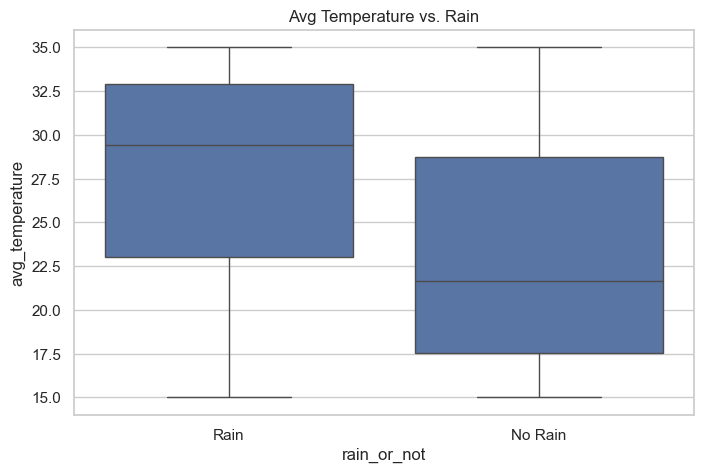

In [48]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=data["rain_or_not"], y=data["avg_temperature"])
plt.title("Avg Temperature vs. Rain")
plt.show()

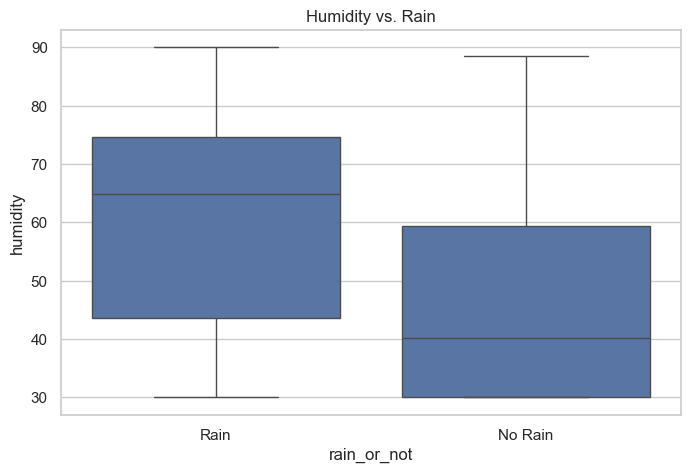

In [49]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=data["rain_or_not"], y=data["humidity"])
plt.title("Humidity vs. Rain")
plt.show()

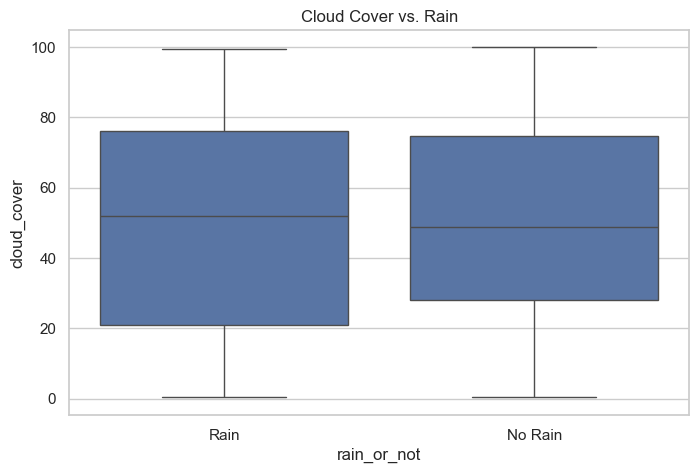

In [50]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=data["rain_or_not"], y=data["cloud_cover"])
plt.title("Cloud Cover vs. Rain")
plt.show()

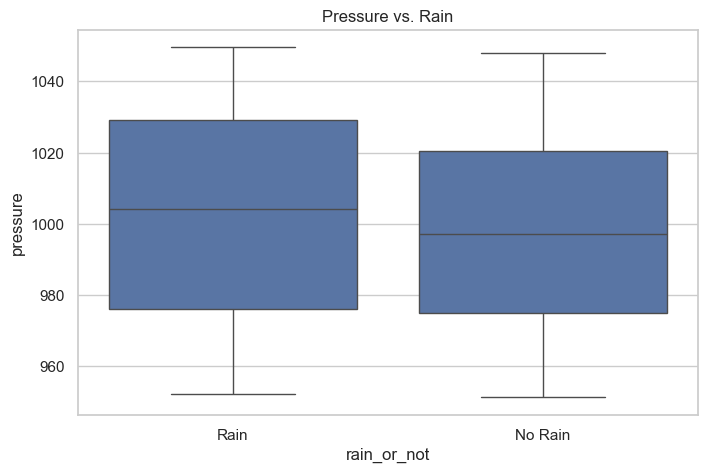

In [51]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=data["rain_or_not"], y=data["pressure"])
plt.title("Pressure vs. Rain")
plt.show()

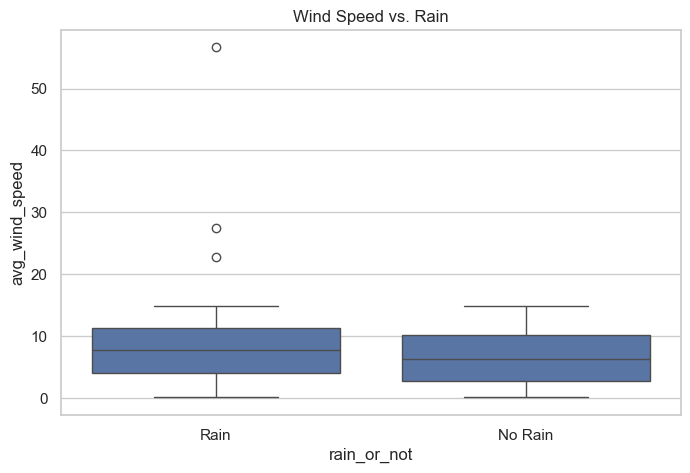

In [52]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=data["rain_or_not"], y=data["avg_wind_speed"])
plt.title("Wind Speed vs. Rain")
plt.show()

Here we can clearly say that there are outliers in avg_wind_speed

In [53]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
# Q1 = data["avg_wind_speed"]. quantile(0.25)
# Q3 = data["avg_wind_speed"]. quantile(0.75)

# # Compute IQR
# IQR = Q3 - Q1

# # Define outlier thresholds
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# data = data [(data["avg_wind_speed"] >= lower_bound) & (data["avg_wind_speed"] <= upper_bound)]


when trying to remove outlier accuracy in increasing since it may contain Valuable data let's transform it.

In [54]:
data["avg_wind_speed"] = np.log1p(data["avg_wind_speed"]+1) # 1 is added to avoid zero or minus values

Pair Plot 

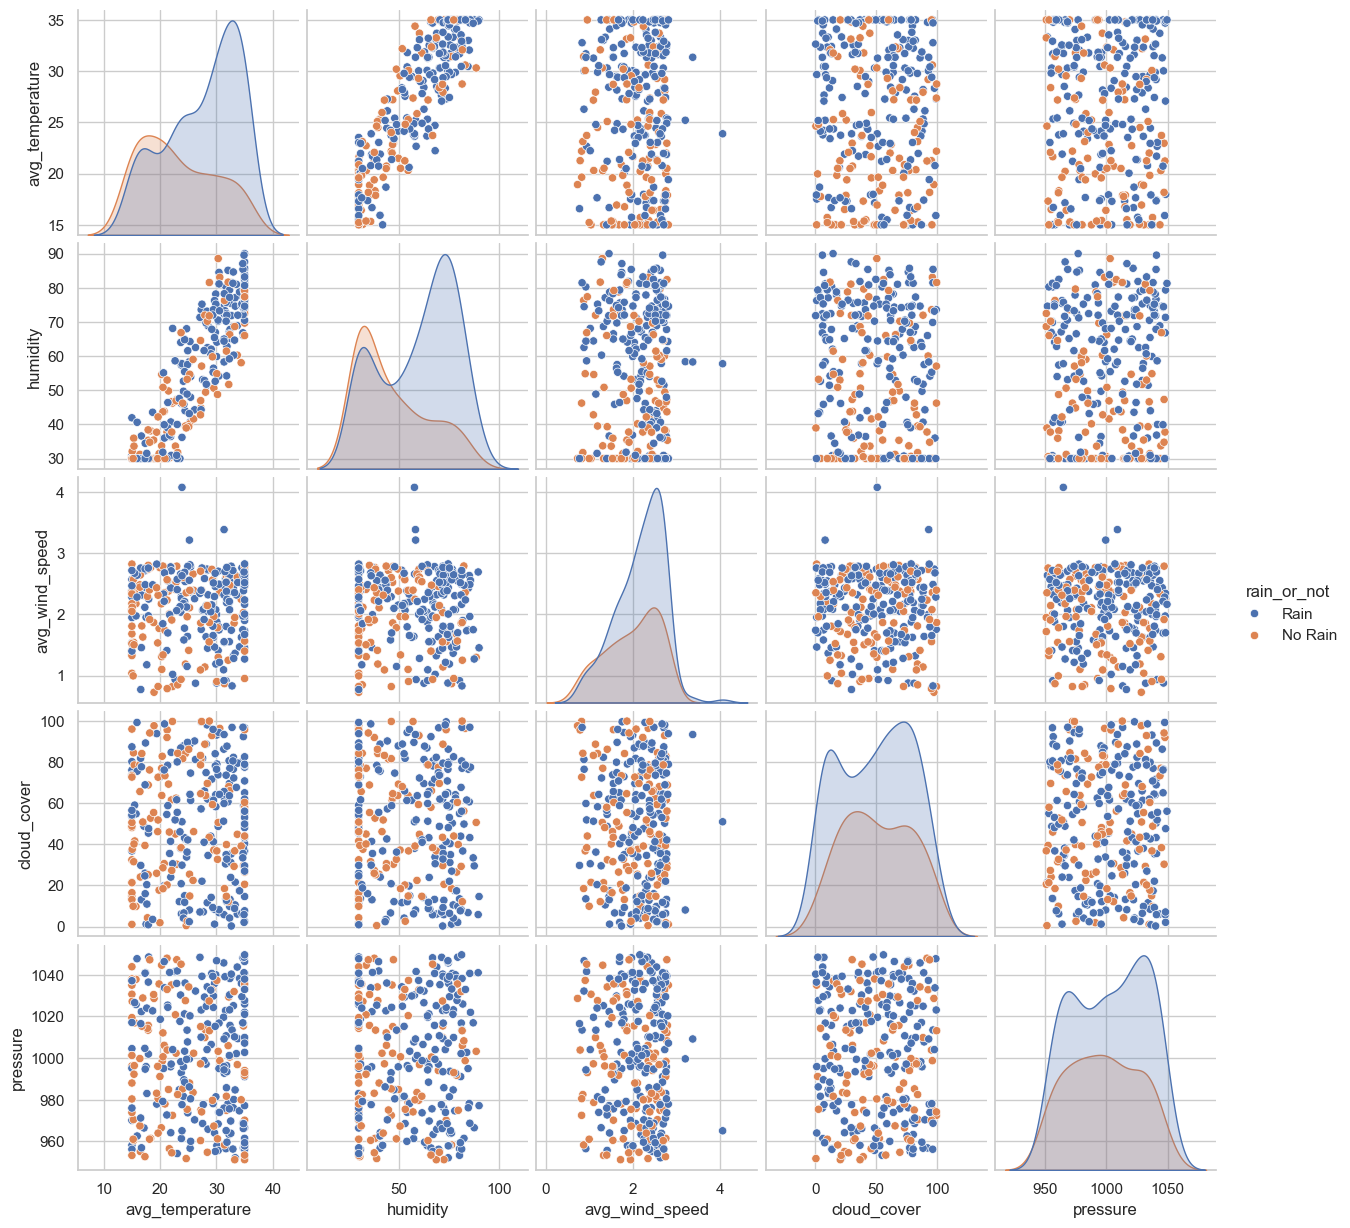

In [55]:
sns.pairplot(data, hue="rain_or_not", diag_kind="kde")
plt.show()

# Making the Model

In [56]:
data['cal1'] = data['humidity'] *data['cloud_cover']
data['cal2'] = data['cloud_cover']*(data['avg_wind_speed'])


In [57]:
# preparing dataset
X = data.drop(columns=['rain_or_not','date','cloud_cover','humidity','avg_wind_speed'])
y = data['rain_or_not']

In [58]:
#normalizing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [59]:
#split for trainning and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [60]:
# trainning the model

model = LogisticRegression(max_iter=5000,penalty='l2',solver='saga') # normaly logistic regression is performming well

model.fit(X_train, y_train)

LogisticRegression(max_iter=5000, solver='saga')

In [61]:
y_pred = model.predict(X_test)

In [62]:
print(y_pred)

['Rain' 'Rain' 'No Rain' 'No Rain' 'Rain' 'Rain' 'Rain' 'Rain' 'Rain'
 'No Rain' 'Rain' 'No Rain' 'Rain' 'No Rain' 'Rain' 'Rain' 'Rain' 'Rain'
 'Rain' 'Rain' 'Rain' 'Rain' 'Rain' 'Rain' 'Rain' 'Rain' 'Rain' 'Rain'
 'Rain' 'Rain' 'No Rain' 'Rain' 'Rain' 'No Rain' 'No Rain' 'No Rain'
 'No Rain' 'Rain' 'Rain' 'Rain' 'No Rain' 'Rain' 'No Rain' 'Rain'
 'No Rain' 'Rain' 'Rain' 'No Rain' 'Rain' 'Rain' 'Rain' 'Rain' 'Rain'
 'Rain' 'Rain' 'Rain' 'Rain' 'Rain' 'Rain' 'No Rain']


In [63]:
# eveluating accuracy

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.75
Confusion Matrix:
[[ 9  9]
 [ 6 36]]
Classification Report:
              precision    recall  f1-score   support

     No Rain       0.60      0.50      0.55        18
        Rain       0.80      0.86      0.83        42

    accuracy                           0.75        60
   macro avg       0.70      0.68      0.69        60
weighted avg       0.74      0.75      0.74        60



In [64]:
data.head()
data.tail()

,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure,cal1,cal2
306,2023-11-03,22.072834,37.756910,1.906479,No Rain,27.307081,954.564875,1031.030997,52.060385
307,2023-11-04,19.645885,42.190604,2.311780,No Rain,51.807877,964.002410,2185.805612,119.768394
308,2023-11-05,23.884496,36.205508,2.629068,Rain,29.872557,977.681431,1081.551119,78.536989
309,2023-11-06,18.168418,34.785000,1.914167,No Rain,94.067925,1047.153269,3272.152745,180.061716
310,2023-11-07,19.389714,37.717416,2.432593,No Rain,25.929676,983.134701,978.000366,63.076341


Code to Predict Future 21-Day Features

In [65]:
def get_future_values(col,lag=15) : 
    col_name = col
    xgb_data = data.copy()
    xgb_data = xgb_data[[col_name]]
    # Feature Engineering: Create 295 Lag Features
    for i in range(1, lag):  # Lag 1 to Lag 295
        xgb_data[f'temp_lag_{i}'] = xgb_data[col_name].shift(i)

    # Drop NaN values after shifting
    xgb_data.dropna(inplace=True)

    X_xgb = xgb_data.drop(columns=[col_name])  # Use past temperatures as features
    y_xgb = xgb_data[col_name]
    # Scale data for better performance
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()

    X_scaled_xgb = scaler_X.fit_transform(X_xgb)
    y_scaled_xgb = scaler_y.fit_transform(y_xgb.values.reshape(-1, 1)).flatten()

    # Train-Test Split
    X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_scaled_xgb, y_scaled_xgb, test_size=0.2,
                                                                        shuffle=False)

    # Initialize XGBoost Model
    model_xgb = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.01, max_depth=3)

    # Train the Model
    model_xgb.fit(X_train_xgb, y_train_xgb)

    # Evaluate Model
    y_pred_scaled = model_xgb.predict(X_test_xgb)
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

    # Print RMSE
    rmse = np.sqrt(mean_squared_error(scaler_y.inverse_transform(y_test_xgb.reshape(-1, 1)), y_pred))
    print(f'RMSE {col}: {rmse:.2f}')

 

    # Start with the last available  data
   
    last_values = X_xgb.iloc[-1].values.reshape(1, -1)  # Get last row as input
    x_cols = X_xgb.columns.tolist()
    # Store predictions
    future_temps = []

    # Predict for the next 21 days (Recursive Forecasting)
    for day in range(21):
        # Convert last_values to DataFrame to retain feature names
        last_values_df = pd.DataFrame(last_values,columns = x_cols)
        last_values_scaled = scaler_X.transform(last_values_df)

        # Predict next day's temperature (scaled)
        next_temp_scaled = model_xgb.predict(last_values_scaled)

        # Convert back to original scale
        next_temp = scaler_y.inverse_transform([[next_temp_scaled[0]]])[0][0]

        # Store predicted temperature
        future_temps.append(next_temp)

        # Update `last_values`: Shift the oldest value out, add the new prediction
        last_values = np.roll(last_values, -1)  # Shift left
        last_values[0, -1] = next_temp  # Replace the last column with the new prediction

    # Convert predictions to DataFrame

    
    return future_temps


n_estimators=5000, learning_rate=0.01, max_depth=5

RMSE avg_temperature: 2.88
RMSE humidity: 7.05
RMSE avg_wind_speed: 0.62
RMSE cloud_cover: 29.38
RMSE pressure: 30.97

n_estimators=1000, learning_rate=0.01, max_depth=3 # this one is choosed
RMSE avg_temperature: 2.84
RMSE humidity: 6.34
RMSE avg_wind_speed: 0.62
RMSE cloud_cover: 28.47
RMSE pressure: 30.25


In [66]:
avg_temperature = get_future_values('avg_temperature', 18)
humidity = get_future_values('humidity', 15)
avg_wind_speed = get_future_values ('avg_wind_speed', 20)
cloud_cover = get_future_values ('cloud_cover', 15)
pressure = get_future_values ('pressure', 10)

predicted_x = []
for i in range(21):
    predicted_x.append ( [ avg_temperature[i], humidity[i] , avg_wind_speed[i], cloud_cover[i], pressure[i] ])

main_cols = ['avg_temperature','humidity', 'avg_wind_speed','cloud_cover','pressure']
predicted_x_df = pd.DataFrame (predicted_x,columns=main_cols)



    

RMSE avg_temperature: 2.84
RMSE humidity: 6.34
RMSE avg_wind_speed: 0.62
RMSE cloud_cover: 28.47
RMSE pressure: 30.25


In [67]:
# do feature engineering for predicted data
predicted_x_df['cal1'] = predicted_x_df['humidity'] *predicted_x_df['cloud_cover']
predicted_x_df['cal2'] = predicted_x_df['cloud_cover']*(predicted_x_df['avg_wind_speed'])
X_predicted = predicted_x_df.drop (columns=['cloud_cover','humidity','avg_wind_speed'])
X_predicted_scaled = scaler.transform(X_predicted)
y_future_prob = model.predict_proba (X_predicted_scaled) [:, 1]

In [68]:
# Predict next 21 days (simulated future data)
future_dates = pd.date_range(start=data['date'].max(), periods=22)[1:]

In [69]:
future_predictions = pd.DataFrame({'Date': future_dates, 'Rain_Probability': y_future_prob})

In [70]:
future_predictions #21 future days raining probability prediction 

,Date,Rain_Probability
0,2023-11-08,0.614804
1,2023-11-09,0.596350
2,2023-11-10,0.502185
3,2023-11-11,0.597872
4,2023-11-12,0.597200
5,2023-11-13,0.535602
6,2023-11-14,0.622656
7,2023-11-15,0.577809
8,2023-11-16,0.507943
9,2023-11-17,0.697702
